In [3]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from climate.core import Weather

# Load weather
epw_file = "./test/weatherfile_AlBateen.epw"
weather = Weather(epw_file).read(
    sun_position=True, 
    pedestrian_wind=True, 
    psychrometrics=True, 
    ground_temp=True, 
    sky_matrix=True, 
    mrt=True, 
    utci=True, 
    _set=False,
    uwg=False
)

# weather.plot()

WEA file created: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.wea
Direct sky matrix calculated: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.dirmtx
Diffuse sky matrix calculated: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.diffmtx
Ground temperature approximation successful
Ground temperature interpolation successful
Wind speed translation successful
Sun position calculations successful
Psychrometric calculations successful
Mean radiant temperature (solar adjusted) calculations successful
Mean radiant temperature (openfield) calculations successful
Universal thermal climate index (solar adjusted) calculations successful
Universal thermal climate index (openfield) calculations successful


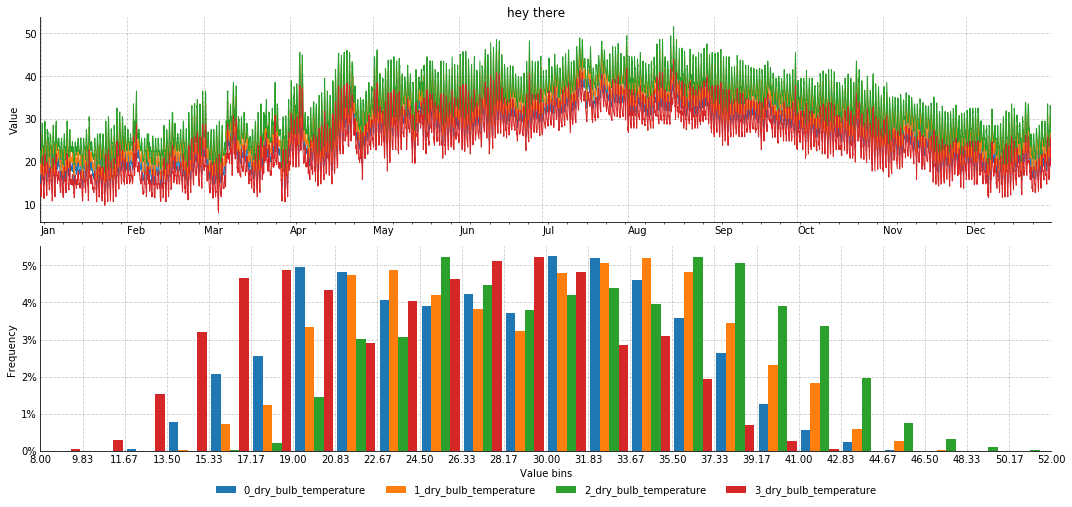

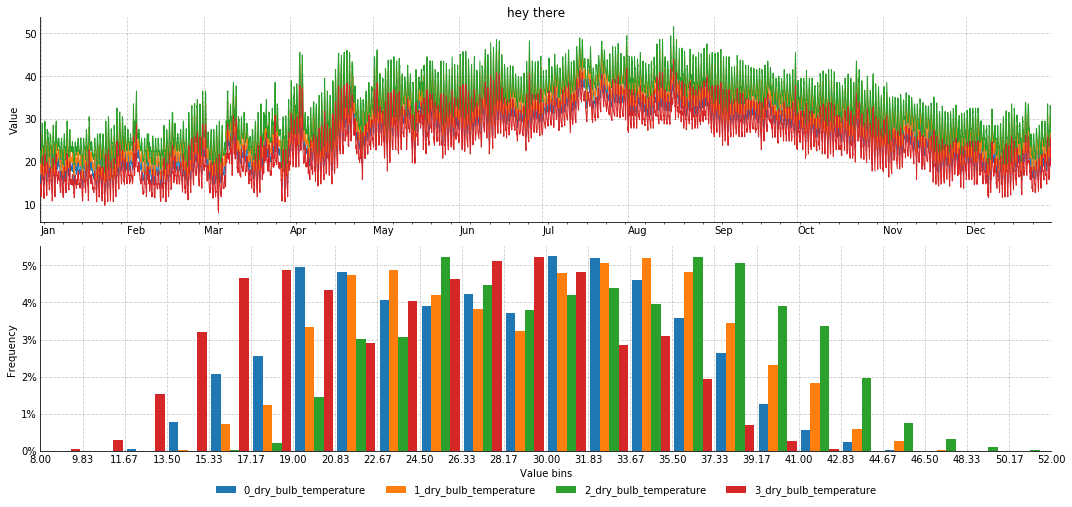

In [170]:
# Compare series

import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')
weeks = mdates.WeekdayLocator()

def compare_series_generic(serieses, names=None, colors=None, bins=None, tone_color="k", savepath=None, title=None):
    
    if names is None:
        names = ["{}_{}".format(n, i.name) for n, i in enumerate(serieses)]
    
    temp = pd.concat(serieses, axis=1, keys=names)
    
    if bins is None:
        bins = np.linspace(np.floor(temp.min().min()), np.ceil(temp.max().max()), 25)
        
    fig, ax = plt.subplots(2, 1, figsize=(15, 7))
    
    # Frequency plot
    ax[1].hist(temp.values, bins, label=temp.columns, rwidth=0.9, lw=0, density=True, zorder=4)
    ax[1].set_xlabel("Value bins", color=tone_color)
    ax[1].set_ylabel("Frequency", color=tone_color)
    ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1].get_yticks()], color=tone_color)
    ax[1].set_xticks(bins, minor=False)
    plt.setp(ax[1].get_xticklabels(), color=tone_color)
    ax[1].grid(axis="both", which="major", color=tone_color, ls="--", alpha=0.2, zorder=2)
    ax[1].set_xlim(np.floor(temp.min().min()), np.ceil(temp.max().max()))
    
    # Series plot
    ax[0].plot(temp, lw=1, zorder=4)
    plt.setp(ax[0].get_xticklabels(), ha='left', color=tone_color)
    plt.setp(ax[0].get_yticklabels(), color=tone_color)
    ax[0].set_ylabel("Value", color=tone_color)
    ax[0].set_xlim(temp.index.min(), temp.index.max())
    [ax[0].spines[j].set_visible(False) for j in ["right", "top"]]
    ax[0].xaxis.set_major_locator(months)
    ax[0].xaxis.set_major_formatter(months_fmt)
    ax[0].xaxis.set_minor_locator(weeks)
    ax[0].grid(axis="both", which="major", color=tone_color, ls="--", alpha=0.2, zorder=2)
        
    [i.tick_params(length=0) for i in ax]
    [[i.spines[j].set_visible(False) for j in ["right", "top"]] for i in ax]
    [[i.spines[j].set_color(tone_color) for j in ["left", "bottom"]] for i in ax]

    lgd = ax[1].legend(bbox_to_anchor=(0.5, 0), loc="upper center", ncol=max(len(serieses), 5), borderaxespad=3, frameon=False) 
    lgd.get_frame().set_facecolor((1, 1, 1, 0))
    [plt.setp(text, color=tone_color) for text in lgd.get_texts()]
    
    # Add title if provided
    if title is not None:
        plt.suptitle(title, color=tone_color, y=1)

    plt.tight_layout()
    
    if savepath is not None:
        plt.savefig(savepath, dpi=300)
    
    plt.close

    return fig

f = compare_series_generic([weather.dry_bulb_temperature, weather.dry_bulb_temperature + 2, weather.dry_bulb_temperature + 4.5, weather.dry_bulb_temperature -3.2], names=None, title="hey there")

f


# Al Dayaan

```python
def utci_frequency_comparison(dfs, titles, hours=['00:00', '23:59'], savepath=None, close=True):
    fig, axes = plt.subplots(len(dfs), 1, figsize=(15, 15), sharey=True, sharex=True)
    for n, df in enumerate(dfs):
        series = df.UniversalThermalClimateIndex.rolling(2).mean()
        data = series.between_time(hours[0], hours[1], include_start=True, include_end=False)
        data.plot.hist(bins=np.arange(-40, 58, 1), ax=axes[n], zorder=4, color='#555555', alpha=0.8, density=True)
        
#         axes[n].set_yticklabels(['{:0.1f}%'.format(x*100) for x in axes[n].get_yticks()])
#         axes[n].set_yticklabels(['{:,.0%}'.format(x) for x in axes[n].get_yticks()])
        axes[n].set_xlabel('UTCI (C)', color='#555555', labelpad=20)
        axes[n].tick_params(axis='both', colors='#555555')
        axes[n].set_ylabel('Frequency', color='#555555')
        axes[n].set_xticks([-40, -27, -13, 0, 9, 26, 32, 38, 46])
        axes[n].set_yticks(np.linspace(0, 0.04, 11))
        axes[n].set_yticklabels(['{:,.1%}'.format(x) for x in axes[n].get_yticks()])
        axes[n].tick_params(axis='both', which='major')
        axes[n].grid(b=True, which='major', color='white', linestyle='--', alpha=0.9, zorder=10)
        [axes[n].spines[spine].set_visible(False) for spine in ['top', 'right']]
        [axes[n].spines[j].set_color('#555555') for j in ['bottom', 'left']]
        axes[n].axvspan(-50, -40, color='#053061', zorder=1)
        axes[n].axvspan(-40, -27, color='#1A5899', zorder=1)
        axes[n].axvspan(-27, -13, color='#347FB9', zorder=1)
        axes[n].axvspan(-13, 0, color='#82BBD9', zorder=1)
        axes[n].axvspan(0, 9, color='#BFDCEB', zorder=1)
        axes[n].axvspan(9, 26, color='#FFFFFF', zorder=1)
        axes[n].axvspan(26, 32, color='#F7C1AA', zorder=1)
        axes[n].axvspan(32, 38, color='#E3806B', zorder=1)
        axes[n].axvspan(38, 46, color='#C84648', zorder=1)
        axes[n].axvspan(46, 60, color='#B2182B', zorder=1)
        axes[n].set_xlim([-50, 60])
        for i, j, k in zip([-45, -33.5, -20, -6.5, 4.5, 17.5, 29, 35, 42, 53], ['{0:.1f}%'.format(i) for i in np.histogram(data, bins=[-100, -40, -27, -13, 0, 9, 26, 32, 38, 46, 100])[0].astype("float") / len(data) * 100], ["Extreme\ncold stress", "Very strong\ncold stress", "Strong\ncold stress", "Moderate\ncold stress", "Slight\ncold stress", "No thermal stress", "Moderate\nheat\nstress", "Strong\nheat\nstress", "Very strong\nheat stress", "Extreme\nheat stress"]):
            bottom, top = axes[n].get_ylim()
            axes[n].text(i, top+0.00025, j, ha='center', va='bottom', color='#555555')
            if n == len(dfs)-1:
                axes[n].text(i, bottom-0.001, k, ha='center', va='top', color='#555555', fontsize='x-small')
        axes[n].set_title("{0:}".format(list(titles)[n]), y=1.075, color="#555555")
    plt.suptitle('UTCI approximation (°C) annual frequency between {0:} and {1:}'.format(hours[0], hours[1]), color='#555555', y=1.01)
    plt.tight_layout()
    
    # Save figure
    if savepath != None:
        print("Saving to {}".format(savepath))
        fig.savefig(savepath, bbox_inches="tight", dpi=300, transparent=False)
    if close:
        plt.close()


def utci_heatmap_comparison(dfs, titles, y_move=-0.22, savepath=None, close=True):
    fig, axes = plt.subplots(len(dfs), 1, figsize=(15, 15), sharex=True)
    for n, df in enumerate(dfs):
        series = df.UniversalThermalClimateIndex.rolling(2).mean().to_frame()
        colors = ['#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#1A5899', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#347FB9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#82BBD9', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#BFDCEB', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#F7C1AA', '#F7C1AA', '#F7C1AA', '#F7C1AA', '#F7C1AA', '#F7C1AA', '#E3806B', '#E3806B', '#E3806B', '#E3806B', '#E3806B', '#E3806B', '#C84648', '#C84648', '#C84648', '#C84648', '#C84648', '#C84648', '#C84648', '#C84648']
        cmap = ListedColormap(colors)
        cmap.set_under('#053061')
        cmap.set_over('#B2182B')
        bounds = np.arange(-41, 48, 1)
        norm = BoundaryNorm(bounds, cmap.N)
        heatmap = axes[n].imshow(
            pd.pivot_table(series, index=series.index.time, columns=series.index.date, values="UniversalThermalClimateIndex").values[::-1], 
            extent=[dates.date2num(series.index.min()), dates.date2num(series.index.max()), 726449, 726450], 
            aspect='auto', cmap=cmap, interpolation='none', vmin=-40, vmax=46)
        axes[n].xaxis_date()
        axes[n].xaxis.set_major_formatter(dates.DateFormatter('%b'))
        axes[n].yaxis_date()
        axes[n].yaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
        axes[n].invert_yaxis()
        axes[n].tick_params(labelleft=True, labelright=True, labelbottom=True)
        plt.setp(axes[n].get_xticklabels(), ha='left', color='#555555')
        plt.setp(axes[n].get_yticklabels(), color='#555555')
        [axes[n].spines[spine].set_visible(False) for spine in ['top', 'bottom', 'left', 'right']]
        axes[n].grid(b=True, which='major', color='white', linestyle='--', alpha=0.9)
        axes[n].set_title("{0:}".format(list(titles)[n]), color='#555555', y=1.03)
        if n == len(dfs)-1:
            cb = fig.colorbar(heatmap, cmap=cmap, norm=norm, boundaries=bounds, orientation='horizontal', drawedges=False, fraction=0.05, aspect=100, pad=0.1, extend='both', ticks=[-40, -27, -13, 0, 9, 26, 32, 38, 46])
            plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='#555555')
            cb.outline.set_visible(False)
        
            axes[n].text(0, y_move, 'Extreme\ncold stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(-27 + (-40 - -27) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Very strong\ncold stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(-13 + (-27 - -13) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Strong\ncold stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(0 + (-13 - 0) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Moderate\ncold stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(0 + (9 - 0) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Slight\ncold stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(9 + (26 - 9) / 2, [-44.319, 50.319], [0, 1]), y_move, 'No thermal stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(26 + (32 - 26) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Moderate\nheat stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(32 + (38 - 32) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Strong\nheat stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(np.interp(38 + (46 - 38) / 2, [-44.319, 50.319], [0, 1]), y_move, 'Very strong\nheat stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
            axes[n].text(1, y_move, 'Extreme\nheat stress', ha='center', va='center', transform=axes[n].transAxes, color='#555555', fontsize='small')
    plt.suptitle('UTCI approximation (°C)', color='#555555', y=1.01)
    plt.tight_layout()
    
    # Save figure
    if savepath != None:
        print("Saving to {}".format(savepath))
        fig.savefig(savepath, bbox_inches="tight", dpi=300, transparent=False)
    if close:
        plt.close()

# utci_frequency_comparison(comp_dict.values(), comp_dict.keys(), hours=['00:00', '23:59'], savepath="../Weatherfiles/Charts/UTCI_Frequency_A2Scenario_Comparison.png", close=False)

utci_heatmap_comparison(comp_dict.values(), comp_dict.keys(), savepath="../Weatherfiles/Charts/UTCI_Heatmap_A2Scenario_Comparison.png", close=False)

for k, v in comp_dict.items():
    print("{0:0.1%}".format(len(v.UniversalThermalClimateIndex[v.UniversalThermalClimateIndex >= 26]) / 8760))
```

# CCWorldWeatherGen

In [66]:
from climate.common.helpers import chunk
from pathlib import Path

import pandas as pd
import numpy as np

def find_files(directory, extension=None):
    p = Path(directory).glob('**/*')
    if extension is None:
        files = [x for x in p if x.is_file()]
    else:
        files = [x for x in p if x.is_file() and x.suffix == extension]
    return files

def load_hadcm3(file_path):
    """ Loads a HadCM3 file into a numpy array of shape (7008, 12)
    
    """
    with open(file_path, "r") as f:
        nparray = np.array([[float(k) for k in  "  ".join(j[6:]).split()] for j in chunk([i.strip() for i in f.readlines()], n=12)])
    return nparray


hadcm3_files = find_files(r"C:\Users\tgerrish\Documents\GitHub\climate\climate\cc_world_weather_gen\HadCM3data")

d = {
    "A2a": {1980: {}, 2020: {}, 2050: {}, 2080: {}, },
    "A2b": {1980: {}, 2020: {}, 2050: {}, 2080: {}, },
    "A2c": {1980: {}, 2020: {}, 2050: {}, 2080: {}, }
}
for f in hadcm3_files:
    model, scenario, variable, year = f.stem.split("_")
    d[scenario][int(year)][variable] = load_hadcm3(f)

In [100]:
month = 0


np.array(chunk(d["A2a"][2020]["TEMP"][0], n=96, method="size"))[27, 16]  # [0]

weather.longitude

54.458